# Project Aim

Worked with the **COVID19 dataset**, published by John Hopkins University, which consists of the data related to the cumulative number of confirmed cases, per day, in each Country. Also, we have another dataset consist of **various life factors**, scored by the people living in each country around the globe.  We are going to merge these two datasets to see if there is any **relationship between the spread of the virus in a country and how happy people are, living in that country.**


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Importing the COVID19 dataset

In [2]:
corona_dataset_csv = pd.read_csv('C:\\Users\\Romit\\Downloads\\Covid19-Data-Analysis-master\\covid19_Confirmed_dataset.csv')
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Cleaning the dataset:

1. Dropped the latitude and longitude columns in the previous step from the dataset as it won't be needed.
2. We group the dataset by Country/Region column and return the total values w.r.t to each Country/Region.

In [3]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Plotting the dataset:
- Plot with the dates in x-axis and the increase in number of confirmed cases in the y-axis.
- From the plot we derive that:
  - Cases in China reach a constant increase after 6000 cases(approx.)
  - Spain has the highest confirmed cases in comparison with China and Italy.
  - Italy has the second highest confirmed cases and is lagging behind Spain by a slight margin.

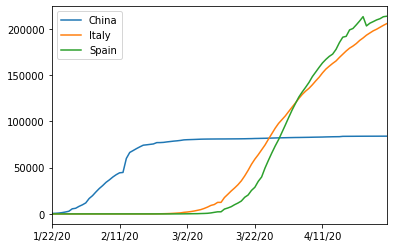

In [4]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

## Determining the max infection rates:
- Declaring an empty list - max_infection_rates
- Append the elements from the corona_dataset_aggregated
  - Access the dataset by the column - country
  - Calculate the difference between previous columns by country
  - Finally append the maximum difference in the max_infection_rates
  
- Create a new column max_infection_rate with the values from the list max_infection_rate

In [5]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates

corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


## Creating a new dataframe

- Country/Region as the index values
- max_infection_rate from the modified dataset corona_dataset_aggregated as the column in it

In [6]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Importing World Happiness Dataset

In [7]:
world_happiness_report = pd.read_csv("C:\\Users\\Romit\\Downloads\\Covid19-Data-Analysis-master\\worldwide_happiness_report.csv")
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Cleaning the dataset:

- Dropping columns which won't be needed in the analysis
- Setting the index of the world_happiness_report dataset to Country or Region, so that the joining both the datasets with the same index value would be easier

In [8]:
world_happiness_report = pd.read_csv("C:\\Users\\Romit\\Downloads\\Covid19-Data-Analysis-master\\worldwide_happiness_report.csv")
columns_to_drop = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_drop, axis=1, inplace=True)

world_happiness_report.set_index(['Country or region'], inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## Correlation

1. Joining the world_happiness_report with corona_data DataFrame.
2. Compute pairwise correlation of columns, excluding NA / null values.

In [9]:
data = world_happiness_report.join(corona_data).copy()

data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
max infection rate,0.250118,0.191958,0.289263,0.078196,1.000000


## Scatter Plot

**Plotting using Seaborn scatterplot**
- x-axis data is taken as the GDP per capita.
- natural logarithm (ln) of max infection rate is taken on the y-axis.

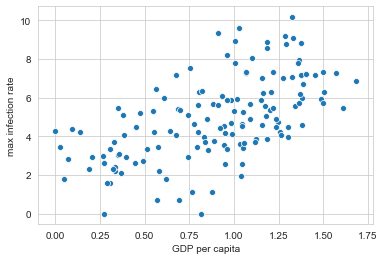

In [31]:
x = data['GDP per capita']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

## Regression Plot

**the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.**<br>

*NOTE:* From the regression plot we can make out that the GDP per capita vs max infection rate has a linear increase.

**GDP PER CAPITA VS MAX INFECTION RATE**

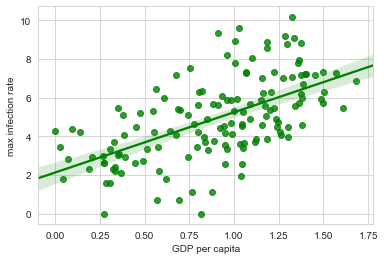

In [32]:
sns.set_style('whitegrid')
sns.regplot(x,np.log(y), color='green')

**SOCIAL SUPPORT VS MAX INFECTION RATE**

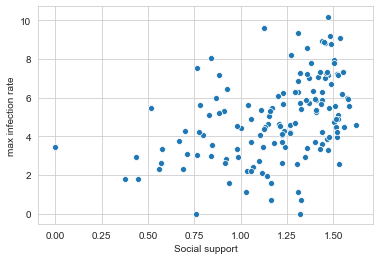

In [16]:
x = data['Social support']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

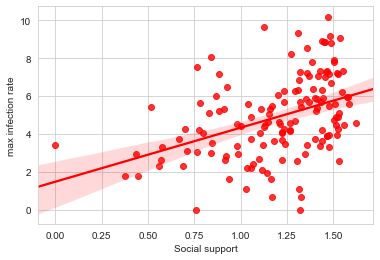

In [19]:
sns.regplot(x,np.log(y), color = 'red')

**HEALTHY LIFE EXPECTANCY VS MAX INFECTION RATE**

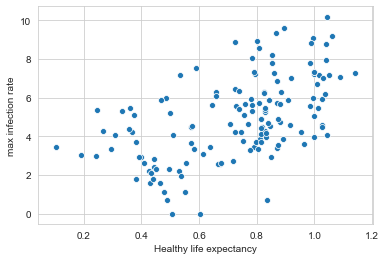

In [20]:
x = data['Healthy life expectancy']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

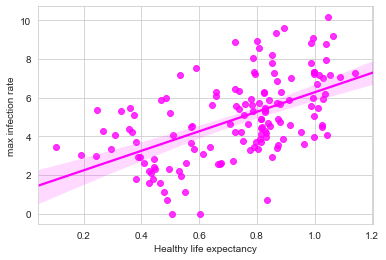

In [24]:
sns.regplot(x,np.log(y), color = 'magenta')

**FREEDOM TO MAKE LIFE CHOICES VS MAX INFECTION RATE**

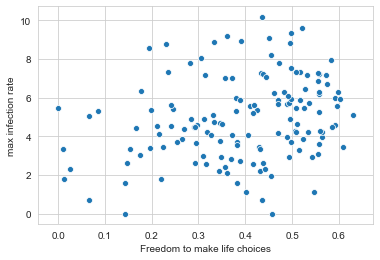

In [25]:
x = data['Freedom to make life choices']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

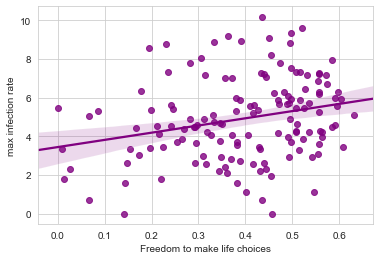

In [30]:
sns.regplot(x,np.log(y), color='purple')

# CONCLUSION

1. People who are living in more developed countries are prone to COVID-19 compared to those in less developed countries.
   - One of the possible reasons might be due to less availability of testing kits in the less developed countries.